<h1>Importing Libraries </h1>


In [1]:
# !pip install --upgrade opencv-contrib-python
#!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob as gb
import cv2
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten , MaxPooling2D , BatchNormalization ,experimental
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow import keras
from keras.models import Model

In [3]:
pwd

'c:\\Users\\ashuo\\Downloads\\GithubProjects\\OpenCV-Computer-Vision\\LAB_6'

In [4]:
#data path
trainpath = 'c:\\Users\\ashuo\\Downloads\\GithubProjects\\OpenCV-Computer-Vision\\LAB_6\\Data\\Train'#
testpath = 'c:\\Users\\ashuo\\Downloads\\GithubProjects\\OpenCV-Computer-Vision\\LAB_6\\Data\\Test'

<h1>Reading the Train Image </h1>


In [5]:
new_size=224
train_images=[]
train_labels=[]
for i in os.listdir(trainpath):#entering train folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(trainpath+'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:# reading each images
      class_cancer={'benign':0,'malignant':1}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      train_images.append(list(resize_image))
      train_labels.append(class_cancer[i])
      

Entering to the folder name: benign
Number of images in the folder is 25
Entering to the folder name: malignant
Number of images in the folder is 25


<h1>Visualizing Train Images </h1>


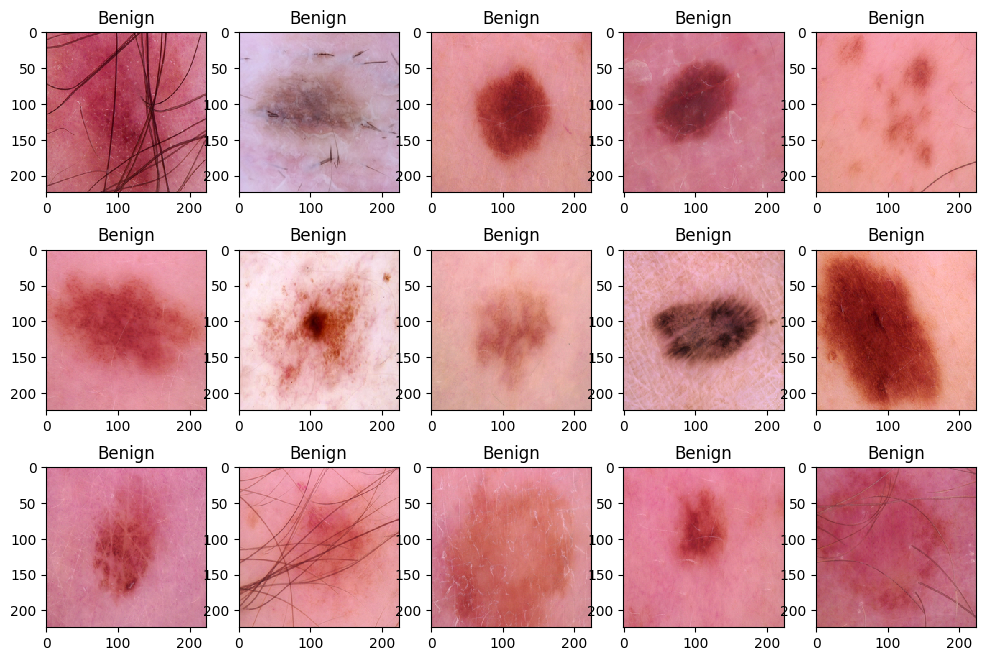

In [6]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(train_images[i], interpolation='nearest')
plt.show()

### Reading Test Images


In [7]:
new_size=224
test_images=[]
test_labels=[]
for i in os.listdir(testpath):# entering to the test folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(testpath +'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:
      class_cancer={'benign':0,'malignant':1}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      test_images.append(list(resize_image))
      test_labels.append(class_cancer[i])

Entering to the folder name: benign
Number of images in the folder is 25
Entering to the folder name: malignant
Number of images in the folder is 25


## Visualizing Test Image


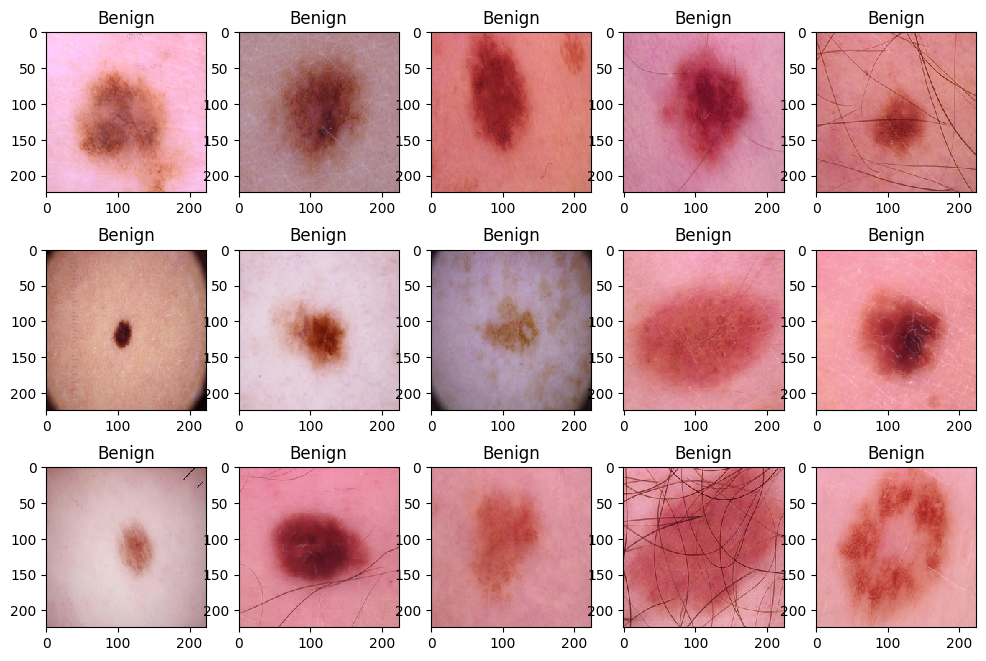

In [8]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if test_labels[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(test_images[i], interpolation='nearest')
plt.show()

In [9]:
def list_to_array_train(train_images,train_labels):
  return np.array(train_images),np.array(train_labels)

X_train,y_train=list_to_array_train(train_images,train_labels)


def list_to_array_test(test_images,test_labels):
  return np.array(test_images),np.array(test_labels)


X_test,y_test=list_to_array_test(test_images,test_labels)


In [10]:
print(X_train.shape)
print("*"*20)
print(y_train.shape)
print("*"*20)
print(X_test.shape)
print(y_test.shape)

(50, 224, 224, 3)
********************
(50,)
********************
(50, 224, 224, 3)
(50,)


In [11]:
def keras_to_categorical(y_train,y_test):
  return to_categorical(y_train),to_categorical(y_test)
y_train1=y_train
y_test1=y_test
y_train,y_test=keras_to_categorical(y_train,y_test)

In [12]:
y_train1.shape,y_test1.shape

((50,), (50,))

##RAW VGG16


In [13]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=256,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=2,kernel_initializer="glorot_uniform", activation='softmax')(d1)
  output = Model(inputs =VGG_model.input, outputs =d2)
  #output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model16=model_vgg16()

In [14]:
model16.compile(optimizer='Adam', loss='mse', metrics='accuracy')

In [15]:
history = model16.fit(X_train, y_train, validation_split=0.2,epochs= 10, batch_size= 5, verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
10/10 [==============================] - 7s 662ms/step - loss: 0.2144 - accuracy: 0.7000 - val_loss: 0.2329 - val_accuracy: 0.7200
Epoch 2/10
10/10 [==============================] - 6s 670ms/step - loss: 0.1225 - accuracy: 0.8400 - val_loss: 0.2597 - val_accuracy: 0.7400
Epoch 3/10
10/10 [==============================] - 6s 665ms/step - loss: 0.0915 - accuracy: 0.9000 - val_loss: 0.2103 - val_accuracy: 0.7600
Epoch 4/10
10/10 [==============================] - 6s 634ms/step - loss: 0.0405 - accuracy: 0.9600 - val_loss: 0.1662 - val_accuracy: 0.8400
Epoch 5/10
10/10 [==============================] - 6s 642ms/step - loss: 0.0234 - accuracy: 0.9800 - val_loss: 0.1225 - val_accuracy: 0.8800
Epoch 6/10
10/10 [==============================] - 6s 654ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1440 - val_accuracy: 0.8400
Epoch 7/10
10/10 [==============================] - 7s 751ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1351 - val_accuracy: 0.8400
Epoch 

### RAW VGG19


In [16]:
def model_vgg19():
  VGG19_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG19_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG19_model.output)
  d1=Dense(units=256,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=2,kernel_initializer="glorot_uniform", activation='softmax')(d1)
  output = Model(inputs =VGG19_model.input, outputs =d2)
  #output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model19=model_vgg19()

In [17]:
model19.compile(optimizer='Adam', loss='mse', metrics='accuracy')

In [18]:
history = model19.fit(X_train, y_train, validation_split=0.2,
                    epochs= 10, batch_size= 5, verbose=1,validation_data=(X_test,y_test)
                   )

Epoch 1/10
10/10 [==============================] - 12s 1s/step - loss: 0.2935 - accuracy: 0.6400 - val_loss: 0.1847 - val_accuracy: 0.8000
Epoch 2/10
10/10 [==============================] - 9s 966ms/step - loss: 0.0754 - accuracy: 0.9000 - val_loss: 0.1764 - val_accuracy: 0.8200
Epoch 3/10
10/10 [==============================] - 10s 1s/step - loss: 0.0306 - accuracy: 0.9800 - val_loss: 0.1840 - val_accuracy: 0.8200
Epoch 4/10
10/10 [==============================] - 10s 1s/step - loss: 0.0121 - accuracy: 0.9800 - val_loss: 0.1611 - val_accuracy: 0.8200
Epoch 5/10
10/10 [==============================] - 10s 1s/step - loss: 5.4532e-04 - accuracy: 1.0000 - val_loss: 0.1711 - val_accuracy: 0.7800
Epoch 6/10
10/10 [==============================] - 10s 1s/step - loss: 7.6339e-04 - accuracy: 1.0000 - val_loss: 0.1653 - val_accuracy: 0.8000
Epoch 7/10
10/10 [==============================] - 10s 1s/step - loss: 2.6123e-04 - accuracy: 1.0000 - val_loss: 0.1537 - val_accuracy: 0.8400
Epoch 

### Feature Extraction of VGG-16


In [19]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  ##d1=Dense(units=256,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='relu')(feature)
  ##d2=Dense(units=2,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='softmax')(d1)
  #output = Model(inputs =VGG_model.input, outputs =d2)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_16=model_vgg16()

In [20]:
model_FE_16.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_16=model_FE_16.predict(X_train)
test_feature_16=model_FE_16.predict(X_test)

2/2 [==============================] - 4s 1s/step


In [21]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_16,y_train)
train_pred=rf.predict(train_feature_16)
test_pred=rf.predict(test_feature_16)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.86


### Feature Extraction VGG19


In [22]:
def model_vgg19():
  VGG_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  ##d1=Dense(units=256,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='relu')(feature)
  ##d2=Dense(units=2,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='softmax')(d1)
  #output = Model(inputs =VGG_model.input, outputs =d2)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_19=model_vgg19()


In [23]:
model_FE_19.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_19=model_FE_19.predict(X_train)
test_feature_19=model_FE_19.predict(X_test)

2/2 [==============================] - 5s 2s/step


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_19,y_train)
train_pred=rf.predict(train_feature_19)
test_pred=rf.predict(test_feature_19)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.86


### Fusion of Features in VGG16 & VGG19


In [25]:
final_train=np.hstack((train_feature_16,train_feature_19))
final_test=np.hstack((test_feature_16,test_feature_19))

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(final_train,y_train)
train_pred=rf.predict(final_train)
test_pred=rf.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.78


In [27]:
# Employ the following ML models instead of Random Forest and Compare the Results
# XGBoost
# Support Vector Classifier
# Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc=dtc.fit(final_train,y_train)
train_pred=dtc.predict(final_train)
test_pred=dtc.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.74


In [29]:
## bottle neck features
## not added the dense layers
## output is the features extracted
## returns the extraced deep features 
## From vgg16 model extract the deep features

## train a shallow machine learning classifer--> takes an input fits on the train data and predicts on the test data

## afert max pooling 2d Layer we have two
## dense layers are basically fully connected layers --> multilevel perceptron
## instead of these we can use shallow machine learning classifier like support vector machine, random forest, decision tree, xgboost

## i am giving the deep features to train teh random forest classifier
## train the random forest classifier on the deep features 

##for test set also i will give the deep features to the random forest classifier

## we extract deep features from the deep learning models and on top of that we apply the shallow machine learning models
## ---> extracting deep features from vgg-16 and vgg-19

## Fusion of features of vgg-16 and vgg-19 --> combining them horizontally using hstack

## Deep feature fusion --> trending research topic